# Tarea programación en SIG, Christopher Cadena Calvo y Alexander Araica Urbina

In [ ]:
!git clone https://github.com/AlexAraica/tareaprograsig

Cloning into 'tareaprograsig'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 1.74 MiB | 4.88 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import streamlit as st

In [ ]:
import pandas as pd


df_transporte = pd.read_csv('tareaprograsig/transporte_aereo.csv')
df_partidas = pd.read_csv('tareaprograsig/pib.csv')
df_pib = pd.read_csv('tareaprograsig/partidas_vuelos.csv')
df_data = pd.read_csv('tareaprograsig/merged_data.csv')

In [ ]:
print(df_transporte)
print(df_partidas)
print(df_pib)
print(df_data)

                pais        2000        2001        2002        2003  \
0              Aruba         NaN         NaN         NaN         NaN   
1                NaN  14963609.0  14546112.0  14462573.0  15802323.0   
2         Afganistán    149705.0         NaN         NaN         NaN   
3                NaN   2949248.0   2627404.0   2072438.0   2081206.0   
4             Angola    235448.0    193317.0    189619.0    198253.0   
..               ...         ...         ...         ...         ...   
261           Kosovo         NaN         NaN         NaN         NaN   
262  Yemen, Rep. del    841609.0    841366.0    869296.0    844284.0   
263        Sudáfrica   8000757.0   7948374.0   8052660.0   9159815.0   
264           Zambia     89628.0     48517.0     47075.0     50977.0   
265         Zimbabwe    607976.0    308096.0    250532.0    200857.0   

           2004        2005        2006        2007        2008  ...  \
0           NaN         NaN         NaN         NaN         NaN

In [ ]:

df_pib_melted = df_pib.melt(id_vars=['pais'], var_name='Year', value_name='GDP')
df_partidas_melted = df_partidas.melt(id_vars=['pais'], var_name='Year', value_name='GDP')
df_transporte_melted = df_transporte.melt(id_vars=['pais'], var_name='Year', value_name='GDP')


In [ ]:

import pandas as pd
import plotly.express as px

df_cleaned = df_pib_melted.dropna(subset=['GDP'])

df_cleaned['GDP'] = pd.to_numeric(df_cleaned['GDP'], errors='coerce')

df_global = df_cleaned.groupby('Year')['GDP'].sum().reset_index()

df_global['pais'] = 'Mundo'

fig = px.bar(df_global,
             y='Year',
             x='GDP',
             title='Crecimiento del PIB Global',
             labels={'GDP': 'Mundo', 'Year': 'Año'},
             orientation='h')

fig.write_html("grafico_pib_global.html")

# Mostramos el gráfico
fig.show()



<ipython-input-6-135a74f78631>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GDP'] = pd.to_numeric(df_cleaned['GDP'], errors='coerce')


# Gráfico 2

El gráfico que nos presenta ofrece una panorámica de la evolución del Producto Interno Bruto (PIB) a nivel global a lo largo de un determinado período. A través de una representación visual clara y concisa, podemos apreciar la tendencia general del crecimiento económico mundial y discernir algunas de las fluctuaciones que han caracterizado este indicador a lo largo del tiempo.

La tendencia general que emerge del gráfico es un crecimiento sostenido del PIB mundial. Esto sugiere que, en promedio, la economía global ha experimentado una expansión continua durante el período analizado. Sin embargo, es importante destacar que este crecimiento no ha sido uniforme y ha estado sujeto a diversas fluctuaciones de año en año.

In [ ]:
df_cleaned_p = df_partidas_melted.dropna(subset=['GDP'])


df_cleaned_p['GDP'] = pd.to_numeric(df_cleaned_p['GDP'], errors='coerce')


df_global_p = df_cleaned_p.groupby('Year')['GDP'].sum().reset_index()


df_global_p['pais'] = 'Mundo'


fig = px.line(df_global_p, x='Year', y='GDP', title='Transporte áreo, partidas de vuelos en todo el mundo de compañías registradas en el país',
              labels={'GDP': 'Mundo', 'Year': 'Año'})

fig.show()


fig.write_html("grafico_partidas.html")

<ipython-input-107-ba61e178a910>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

df_cleaned_t = df_transporte_melted.dropna(subset=['GDP'])


df_cleaned_t['GDP'] = pd.to_numeric(df_cleaned_t['GDP'], errors='coerce')


df_global_t = df_cleaned_t.groupby('Year')['GDP'].sum().reset_index()


df_global_t['pais'] = 'Mundo'


fig = px.line(df_global_t, x='Year', y='GDP', title='Transporte aéreo, pasajeros transportados',
              labels={'GDP': 'Mundo', 'Year': 'Año'})

fig.show()


fig.write_html("grafico_transporte.html")

<ipython-input-7-d8150f82e373>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Histograma

El siguiente gráfico muestra un histograma que representa la evolución de la cantidad de pasajeros transportados vía aérea en un período que abarca desde el año 2000 hasta el 2021. A simple vista, se observa un crecimiento sostenido en el número de pasajeros a lo largo de los años, con algunas fluctuaciones menores.

En términos generales, la tendencia es ascendente, lo que sugiere un aumento constante en la demanda de transporte aéreo durante el período analizado. Esto podría atribuirse a diversos factores, como la globalización, el crecimiento económico en muchas regiones del mundo, la reducción de los costos de los boletos aéreos y la mayor accesibilidad a los viajes en avión.

Es importante destacar que el histograma presenta una aceleración significativa en el crecimiento a partir de un determinado año, lo cual podría indicar un evento o cambio en el entorno que impulsó aún más la demanda de viajes aéreos. Este tipo de análisis más detallado permitiría identificar factores específicos que influyeron en la evolución del transporte aéreo durante el período estudiado.

Además, sería interesante comparar este histograma con otros indicadores económicos y sociales para establecer relaciones de causalidad y comprender mejor las razones detrás de esta tendencia. Por ejemplo, se podría analizar la correlación entre el crecimiento del transporte aéreo y variables como el Producto Interno Bruto (PIB), la población, el gasto turístico o los precios del petróleo.

In [ ]:
# Para mapas interactivos
!pip install leafmap
import leafmap

# Para datos vectoriales
import geopandas as gpd

# Para datos raster
!pip install rasterio
import rasterio

# Para gráficos
import matplotlib.pyplot as plt

# Para crear rampas de colores
from matplotlib.colors import LinearSegmentedColormap

# Para álgebra lineal
import numpy as np

# Para permitir widgets de JavaScript
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.7/502.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.3 MB/s eta 0:00:00


# Leafmap

In [ ]:
# Crear un mapa leafmap
m = leafmap.Map()

# Desplegar el mapa
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
# Desactivar controles de un mapa leafmap
m = leafmap.Map(
    center=(0, 0),
    zoom=2,
    height="400px",
    zoom_control=True,
    draw_control=False,
    scale_control=True,
    fullscreen_control=False,
    attribution_control=False,
    toolbar_control=True
)

# Dirección del servicio de búsqueda
url = "https://nominatim.openstreetmap.org/search?format=json&q={s}"

# Agregar un control de búsqueda
m.add_search_control(url, position="topleft")

# Agregar capa base
m.add_basemap("CartoDB.Positron")


# Desplegar el mapa
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [ ]:
import geopandas as gpd
import leafmap

# Assuming your CSV has 'latitude' and 'longitude' columns
paises_df = pd.read_csv('tareaprograsig/merged_data.csv')  # Read as DataFrame
paises_gdf = gpd.GeoDataFrame(
    paises_df,
    geometry=gpd.points_from_xy(paises_df.LABEL_X, paises_df.LABEL_Y)
) # Create GeoDataFrame
paises_gdf.crs = "EPSG:4326" #Set projection, may need to be changed to the data projection.
# Convert the GeoDataFrame to GeoJSON
geojson_data = paises_gdf.to_json()

# Create leafmap
m = leafmap.Map(height="400px")

# Add basemap
m.add_basemap("CartoDB.Positron")

# Define style
style = {"color": "black", "fillColor": "black", "fillOpacity": 0.1, "weight": 2}

# Add GeoJSON data to the map
m.add_geojson(
    geojson_data,
    style=style,
    layer_name="Países",
    zoom_to_layer=True
)

# Display the map
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Capa Vectorial

El mapa presentado es un ejemplo de representación geográfica mediante datos vectoriales, en el cual se utilizan marcadores en forma de pinos azules para señalar ubicaciones específicas alrededor del mundo. Este enfoque permite destacar puntos concretos de interés, distribuidos estratégicamente en diferentes regiones, sin necesidad de colorear áreas extensas como en los mapas de coropletas.

A simple vista, se observa una distribución de los marcadores en todos los continentes, con una notable concentración en áreas como África, Asia y América del Sur. También se aprecian puntos en América del Norte, Europa y Oceanía, lo que sugiere que los marcadores podrían estar vinculados a sitios clave de carácter internacional. Estos puntos podrían corresponder, por ejemplo, a aeropuertos, destinos turísticos, puertos, ciudades importantes o incluso eventos específicos.

El diseño del mapa es limpio y minimalista, con un fondo claro que resalta los marcadores, y una escala que proporciona contexto sobre las distancias entre las ubicaciones. Este tipo de mapas es ideal para resaltar datos relacionados con lugares específicos, ya sea para análisis de transporte, turismo, economía o planificación estratégica.

Este tipo de representación permite identificar patrones geográficos en la distribución de los puntos. Por ejemplo, podría analizarse si la mayor concentración de marcadores en ciertas regiones se debe a su densidad poblacional, infraestructura desarrollada o su relevancia económica. Además, ofrece la posibilidad de explorar conexiones entre los puntos, como rutas de transporte o redes comerciales.

In [ ]:
import pandas as pd
import geopandas as gpd
import leafmap

# Leer el archivo CSV como DataFrame
paises_df = pd.read_csv('tareaprograsig/merged_data.csv')

# Crear un GeoDataFrame usando las coordenadas LABEL_X (longitud) y LABEL_Y (latitud)
paises_gdf = gpd.GeoDataFrame(
    paises_df,
    geometry=gpd.points_from_xy(paises_df.LABEL_X, paises_df.LABEL_Y)
)

# Establecer el sistema de coordenadas geográficas (WGS84)
paises_gdf.crs = "EPSG:4326"

# Crear un mapa base con Leafmap
m = leafmap.Map(height="400px")
m.add_basemap("CartoDB.Positron")

# Agregar una capa de puntos
point_style = {"radius": 6, "color": "blue", "fillColor": "blue", "fillOpacity": 0.6}
m.add_gdf(
    paises_gdf,
    style=point_style,
    layer_name="Puntos"
)

print(paises_gdf.columns.to_list())


['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [ ]:
import pandas as pd
import geopandas as gpd
import folium

# Cargar el archivo CSV
file_path = 'tareaprograsig/trans.csv'  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(file_path)

# Descargar y descomprimir los datos de los países
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Cargar el archivo shapefile de los países
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Normalizar los nombres para facilitar la unión
data['NAME_EN'] = data['NAME_EN'].str.strip()
world['NAME_EN'] = world['NAME'].str.strip()  # Cambié 'name' a 'NAME' para consistencia

# Unir los datos de los países con el DataFrame
merged_data = world.merge(data, how='left', on='NAME_EN')

# Exportar el DataFrame combinado a un archivo CSV (opcional)
output_path = 'merged_data.csv'  # Cambia la ruta si es necesario
merged_data.to_csv(output_path, index=False, encoding='utf-8')

print(f"El archivo combinado se ha guardado en {output_path}")

# Crear un mapa básico centrado en el mundo
m = folium.Map(location=[0, 0], zoom_start=2)

# Agregar una capa de coropletas basada en los datos del año 2020
choropleth = folium.Choropleth(
    geo_data=merged_data,  # El GeoDataFrame con la geometría
    data=merged_data,  # El mismo GeoDataFrame para los datos
    columns=['NAME_EN', '2020'],  # Las columnas que contienen el nombre del país y el valor de 2020
    key_on='feature.properties.NAME_EN',  # El campo que coincide en los datos geo y el CSV
    fill_color='YlGnBu',  # Paleta de colores para la coropleta
    fill_opacity=0.7,  # Opacidad de las áreas coloreadas
    line_opacity=0.2,  # Opacidad de las líneas de los polígonos
    legend_name='Indicador 2020'  # Título de la leyenda
).add_to(m)

# Mostrar el mapa interactivo
m

--2024-11-23 05:39:20--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.234.201, 52.92.186.145, 52.92.236.201, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.234.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.5’

ne_110m_admin_0_cou 100%[===================>] 209.94K   521KB/s    in 0.4s    

2024-11-23 05:39:21 (521 KB/s) - ‘ne_110m_admin_0_countries.zip.5’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
replace ne_110m_admin_0_countries.README.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: El archivo combinado se ha guardado en merged_data.csv


# Mapa de Coropletas


El mapa presentado es un ejemplo de representación geográfica mediante un mapa de coropletas, donde los diferentes colores indican la cantidad de viajes y pasajeros transportados a nivel mundial. Este tipo de visualización permite observar, de forma clara y concisa, las diferencias en la intensidad de transporte entre las distintas regiones del planeta.

En el mapa, se aprecia que Estados Unidos destaca por su tonalidad azul oscuro, lo que indica una alta cantidad de viajes y pasajeros transportados. Por el contrario, muchas regiones del continente africano aparecen en colores más claros, lo que sugiere una menor actividad en este ámbito. Este contraste refleja disparidades significativas en términos de conectividad, infraestructuras y dinámicas económicas entre los países.

El mapa no solo abarca todos los continentes, sino que también resalta patrones globales importantes. Las regiones más desarrolladas, como América del Norte, Europa y partes de Asia, muestran una mayor actividad de transporte en comparación con áreas menos desarrolladas. Esto podría estar vinculado a factores como la infraestructura de transporte, el desarrollo económico, el turismo y la densidad de población.

Este tipo de herramienta es muy útil para comprender cómo el transporte de pasajeros varía en función de las características geográficas, sociales y económicas de cada región. Además, podría ser enriquecedor extender el análisis para identificar posibles razones detrás de estas disparidades, comparar tendencias entre regiones o analizar cómo la actividad de transporte ha cambiado con el tiempo. Por ejemplo, estudiar cómo eventos globales, como la pandemia de COVID-19, pudieron haber afectado la movilidad internacional.

In [ ]:
# Instalación de paquetes
!pip install pystac-client odc-stac odc-geo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 39.5 MB/s eta 0:00:00


In [ ]:
# Carga de paquetes
import rasterio
from rasterio.transform import from_origin
from pystac_client import Client
from odc.stac import load
import odc.geo.xr

In [ ]:
from shapely.geometry import Point

# Punto central del área de búsqueda
# Estadio ERC
# point = Point(-84.12297702, 9.99945630)
# Sierpe
# point = Point(-83.56669179, 8.87118806)
# RVS Gandoca-Manzanillo
# point = Point(-82.6339, 9.6022)
# Santa Teresa de Cóbano
# point = Point(-85.14673023, 9.64438347)
# Centro de Costa Rica
# point = Point(-84.0, 10.0)
# La Virgen de Sarapiquí
# point = Point(-84.14690179, 10.38176526)
# Finca Pacheco Dent
# point = Point(-82.676167, 9.633083)
# Paiporta, Valencia, España
# point = Point(-0.3809, 39.4312)
# Nosara
point = Point(-84.20865, 9.99397)


# Área de búsqueda
bbox = point.buffer(0.02).bounds

bbox

(-84.22865, 9.97397, -84.18865000000001, 10.013969999999999)

In [ ]:
# Fecha de búsqueda
datetime = "2001-01-01/2020-11-05"

In [ ]:
# Especificación del catálogo y colección STAC en los que se buscan las imágenes
client = Client.open("https://earth-search.aws.element84.com/v1")
collection = "sentinel-2-l2a"

# Búsqueda
search = client.search(collections=[collection],
                       bbox=bbox,
                       datetime=datetime,
                       query=["eo:cloud_cover<5"]
                       )

# Carga de las imágenes
data = load(search.items(), bbox=bbox, chunks={}, crs="EPSG:8857", resolution=10)

# Metadatos de los datos cargados
data

<xarray.Dataset> Size: 72MB
Dimensions:       (y: 511, x: 428, time: 5)
Coordinates:
  * y             (y) float64 4kB 1.283e+06 1.283e+06 ... 1.278e+06 1.278e+06
  * x             (x) float64 3kB -8.011e+06 -8.011e+06 ... -8.007e+06
    spatial_ref   int32 4B 8857
  * time          (time) datetime64[ns] 40B 2017-01-26T16:05:04.457000 ... 20...
Data variables: (12/32)
    aot           (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    blue          (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    coastal       (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    green         (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    nir           (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    nir08         (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    ...            ...
    rededge3-jp2  (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    scl-jp2       (time, y, x) uint8 1MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    swir16-jp2    (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    swir22-jp2    (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    visual-jp2    (time, y, x) float32 4MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>
    wvp-jp2       (time, y, x) uint16 2MB dask.array<chunksize=(1, 511, 428), meta=np.ndarray>

In [ ]:
# Obtener tiempos y nubosidad directamente desde el objeto de datos cargado
times = data.time.values  # Extraer los valores de tiempo del objeto data
cloud_coverages = [item.properties['eo:cloud_cover'] for item in search.items()]
# Mostrar tiempos y porcentajes de nubosidad
for idx, (time, nubosidad) in enumerate(zip(times, cloud_coverages)):
    print(f"t{idx}: Fecha: {time}, Nubosidad: {nubosidad}%")

t0: Fecha: 2017-01-26T16:05:04.457000000, Nubosidad: 4.618568%
t1: Fecha: 2018-02-05T16:10:21.945000000, Nubosidad: 2.33619%
t2: Fecha: 2018-04-01T16:09:55.478000000, Nubosidad: 1.68767%
t3: Fecha: 2018-04-01T16:10:34.318000000, Nubosidad: 1.221783%
t4: Fecha: 2020-02-10T16:10:27.679000000, Nubosidad: 3.76594%


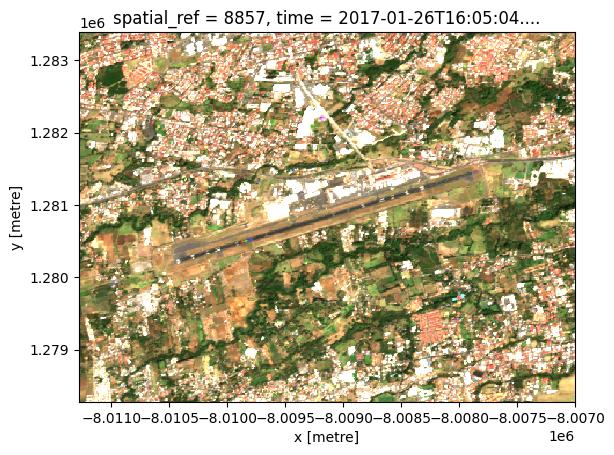

In [ ]:
# Visualización en el tiempo inicial
data[["red", "green", "blue"]].isel(time=0).to_array().plot.imshow(vmin=0, vmax=1500)

# Capa Raster

La imagen capturada por satélite nos transporta a Costa Rica, específicamente al Aeropuerto Internacional Juan Santamaría, en un día de 2017. Desde las alturas, podemos apreciar la complejidad y el dinamismo de este importante centro de transporte. Las pistas de aterrizaje se extienden como venas de un organismo vivo, cruzando la imagen de un extremo a otro. Los edificios terminales, con sus formas geométricas y techos relucientes, contrastan con la vegetación circundante. Hangares y otras estructuras auxiliares se dispersan por el terreno, dando cuenta de la actividad constante que se desarrolla en este lugar.

La imagen está georreferenciada, lo que significa que cada punto de la fotografía puede ser ubicado con precisión en un mapa. Los ejes x e y, que miden las coordenadas en metros, nos permiten orientarnos y realizar mediciones. La escala, aunque no está explícitamente indicada, nos permite apreciar el tamaño real de las instalaciones aeroportuarias en relación con su entorno.

La paleta de colores de la imagen es predominantemente natural, con tonos de verde que representan la vegetación y tonos grises y marrones que corresponden a las construcciones. El contraste es adecuado, lo que permite distinguir fácilmente los diferentes elementos de la imagen. La resolución es suficiente para apreciar los detalles más relevantes, como las líneas de las pistas, las formas de los edificios y la textura del terreno.